In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima_model import ARIMA

warnings.filterwarnings('ignore')

In [3]:
emissions = pd.read_csv("D:\Kuliah\BasicStats\EVEN_FinalProj\datasets\API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3159114.csv", skiprows=3)

# processing the CO2 emissions dataset to only show Indonesia
indo_emissions = emissions.loc[emissions["Country Name"] == "Indonesia"]
indo_emissions.drop("Unnamed: 65", axis=1, inplace=True)
# dropping the NaN values as it doesn't affect the analysis
indo_emissions.drop(["2019", "2020"], axis=1, inplace=True)

# slicing the dataframe to get usable features
indo_emissions = indo_emissions.iloc[:, 4:]
indo_emissions = indo_emissions.transpose()
indo_emissions.rename(columns={106:"CO2 emissions (metric tons per capita)"}, inplace=True)
indo_emissions.index = pd.to_datetime(indo_emissions.index)
 
indo_emissions

,CO2 emissions (metric tons per capita)
1960-01-01,0.243920
1961-01-01,0.288848
1962-01-01,0.248553
1963-01-01,0.239783
1964-01-01,0.229458
1965-01-01,0.246241
1966-01-01,0.227084
1967-01-01,0.232007
1968-01-01,0.253602
1969-01-01,0.298784


<AxesSubplot:>

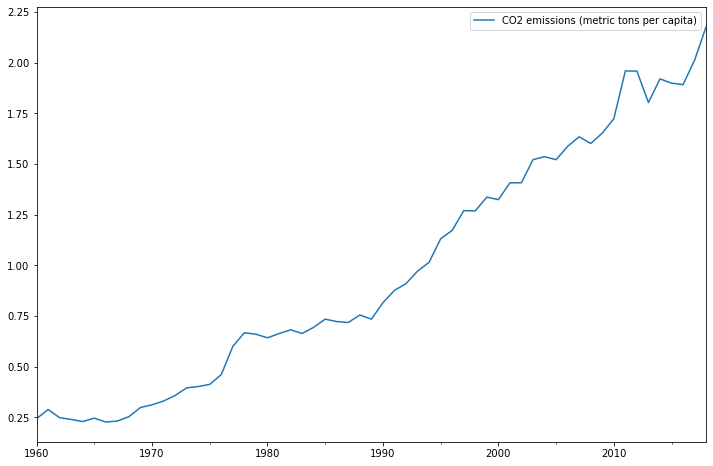

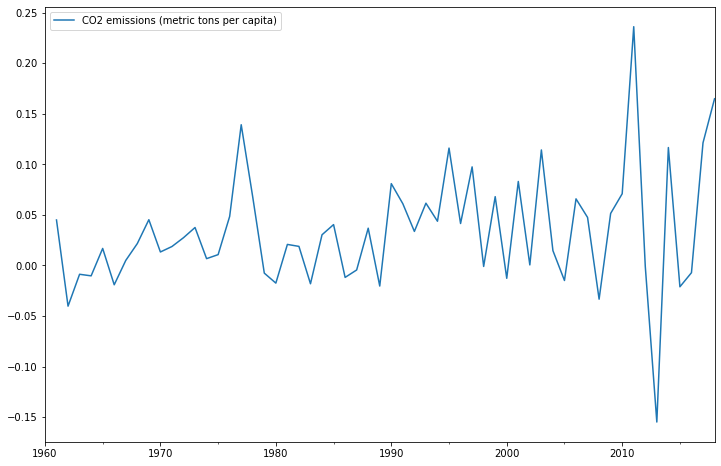

In [4]:
# plotting the original dataset and the first differential
indo_emissions.plot(figsize=(12, 8))
indo_emissions.diff().plot(figsize=(12, 8))

In [5]:
# using the ARIMA model to determine the trend
# find the p-value using differencing
indo_emissions["CO2 emissions diff"] = indo_emissions.diff()
indo_emissions.fillna(method="bfill", inplace=True)

result = adfuller(indo_emissions["CO2 emissions diff"].values)
print("ADF Statistic: %f" %result[0])
print("p-value: %f" %result[1])

ADF Statistic: -5.787204
p-value: 0.000000


In [6]:
# using the 111 ARIMA model
model = ARIMA(indo_emissions["CO2 emissions (metric tons per capita)"].values, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   58
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  82.923
Method:                       css-mle   S.D. of innovations              0.058
Date:                Sat, 01 Jan 2022   AIC                           -157.847
Time:                        17:14:47   BIC                           -149.605
Sample:                             1   HQIC                          -154.637
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0334      0.008      4.234      0.000       0.018       0.049
ar.L1.D.y     -0.4917      0.605     -0.813      0.416      -1.677       0.694
ma.L1.D.y      0.5499      0.572      0.962      0.3

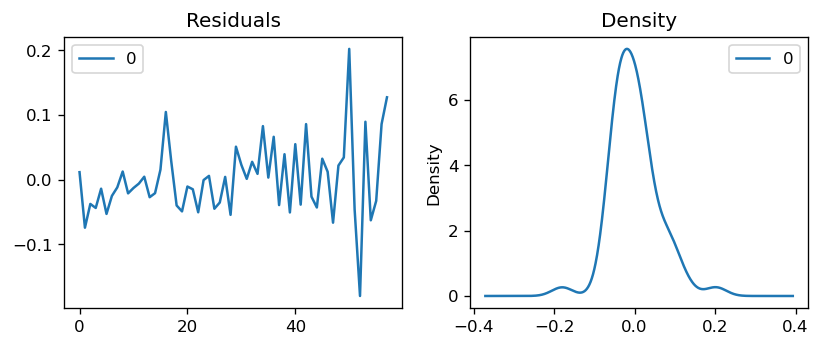

In [7]:
residuals = pd.DataFrame(model_fit.resid)
plt.rcParams.update({"figure.figsize": (8, 3), 'figure.dpi':120})
fig, ax = plt.subplots(1, 2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title="Density", ax=ax[1])
plt.show()

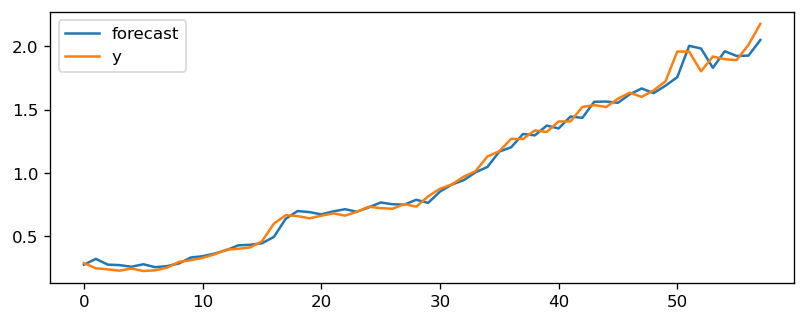

In [8]:
model_fit.plot_predict(dynamic=False)
plt.show()

[2.217317014996115, 2.248106652686607, 2.2828624208156447, 2.3156679615371347, 2.349432468939142, 2.382725432822284, 2.416250264292383, 2.4496610817304143, 2.4831279621985525, 2.5165672753288133]


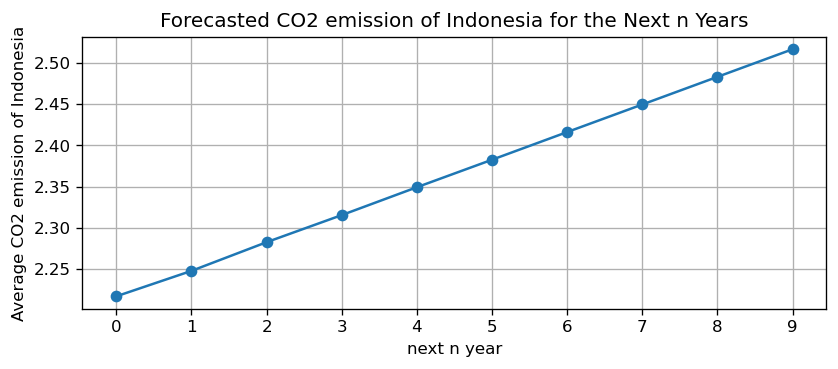

In [12]:
forecast = model_fit.forecast(steps=10)[0]
forecast_values = []
for value in forecast:
    forecast_values.append(value)

plt.plot(range(0, len(forecast_values)), forecast_values, marker="o")
plt.xticks(range(0, len(forecast_values)))
plt.xlabel("next n year")
plt.ylabel("Average CO2 emission of Indonesia")
plt.title("Forecasted CO2 emission of Indonesia for the Next n Years")
plt.grid()
print(forecast_values)